In [1]:
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', 50)

In [2]:
train_feature_filename = "dengue_features_train.csv"
train_label_filename = "dengue_labels_train.csv"

test_feature_filename = "dengue_features_test.csv"

train_features = pd.read_csv(train_feature_filename, index_col=[0,1,2])

train_labels = pd.read_csv(train_label_filename, index_col=[0,1,2])

# train_features.loc[0, 'precipitation_amt_mm_last_week'] = train_features.loc[0, 'precipitation_amt_mm']
# for i in range(1, len(train_features)):
#     train_features.loc[i, 'precipitation_amt_mm_last_week'] = train_features.loc[i-1, 'precipitation_amt_mm']

feature_columns = list(train_features.columns)[-4:-1]
print(feature_columns)
for col in feature_columns:
    train_features[col + '_last_week'] = None
prev_index = None
for index, row in train_features.iterrows():
    if prev_index :
        for col in feature_columns:
            train_features.ix[index, col + '_last_week'] = train_features.ix[prev_index, col]
    prev_index = index    

train_features = train_features.iloc[1:]

train_features.head()

['station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   
          23              1990-06-04       NaN  0.174850  0.254314  0.181743   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   
          23                          9.58             299.630000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   
          23                     299.764286                   295.851429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   
          23                              302.4                      298.1   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   
          23                                    26.49   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   
          23                                     79.891429   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   
          23                                  9.58   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   
          23                                      17.212857   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 19                   2.371429           26.714286   
          20                   2.300000           2

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
('features: ', (935, 24))
('labels  : ', (936, 1))

Iquitos
('features: ', (520, 24))
('labels  : ', (520, 1))


In [5]:
# Remove `week_start_date` string.
# sj_train_features.drop('week_start_date', axis=1, inplace=True)
# iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [6]:
# Null check
pd.isnull(sj_train_features).any()

week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
station_diur_

Text(0.5,0,'Time')

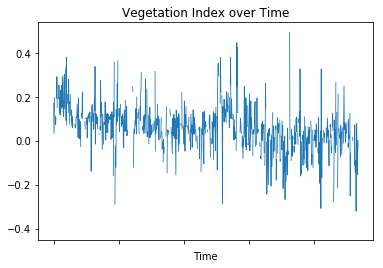

In [7]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Since these are time-series, we can see the gaps where there are <b>NaN</b>s by plotting the data. Since we can't build a model without those values, we'll take a simple approach and just fill those values with the most recent value that we saw up to that point. This is probably a good part of the problem to improve your score by getting smarter.

In [8]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<b>Distribution of labels</b>

Our target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. Standard regression techniques for this type of prediction include

* Poisson regression
* Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that the mean and variance of the population distributiona are equal. When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better. Why? It isn't magic. The negative binomial regression simply lifts the assumption that the population mean and variance are equal, allowing for a larger class of possible models. In fact, from this perspective, the Poisson distribution is but a special case of the negative binomial distribution.

Let's see how our labels are distributed!

In [9]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
('mean: ', 34.18055555555556)
('var :', 2640.0454396910277)

Iquitos
('mean: ', 7.565384615384615)
('var :', 115.89552393656439)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d416af490>]],
      dtype=object)

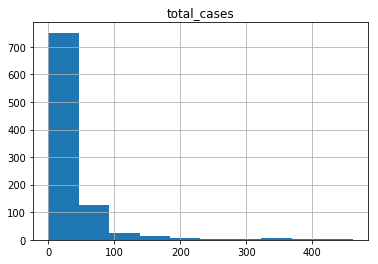

In [10]:
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d4163b790>]],
      dtype=object)

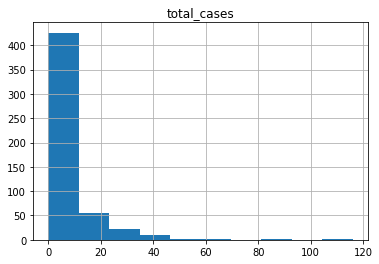

In [11]:
iq_train_labels.hist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'San Juan Variable Correlations')

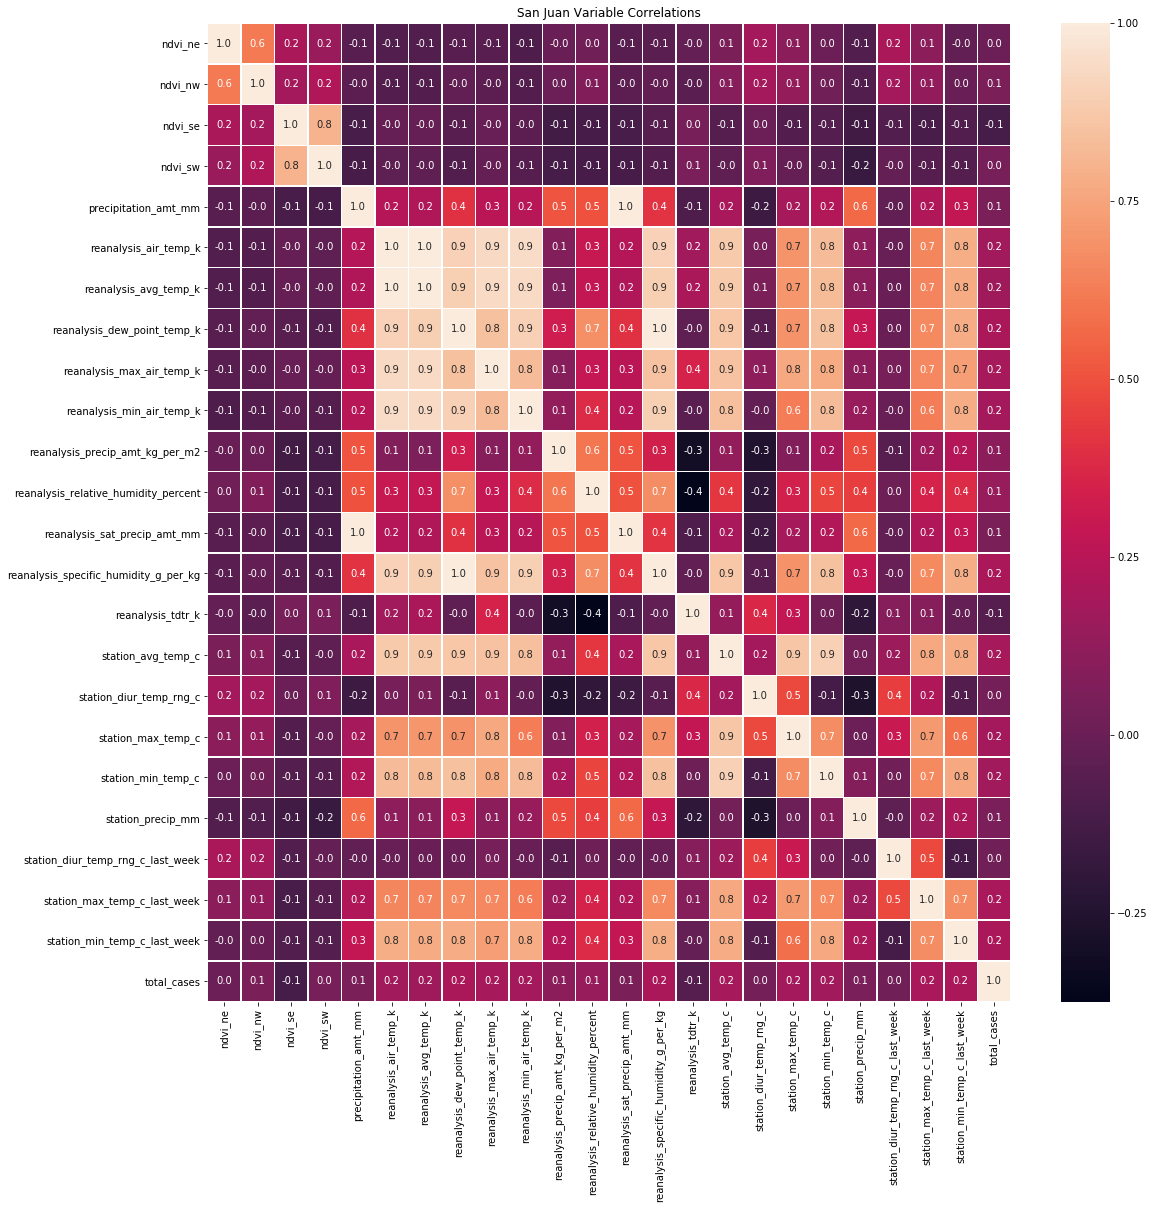

In [12]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

# plot san juan
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(sj_train_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('San Juan Variable Correlations')

Text(0.5,1,'Iquitos Variable Correlations')

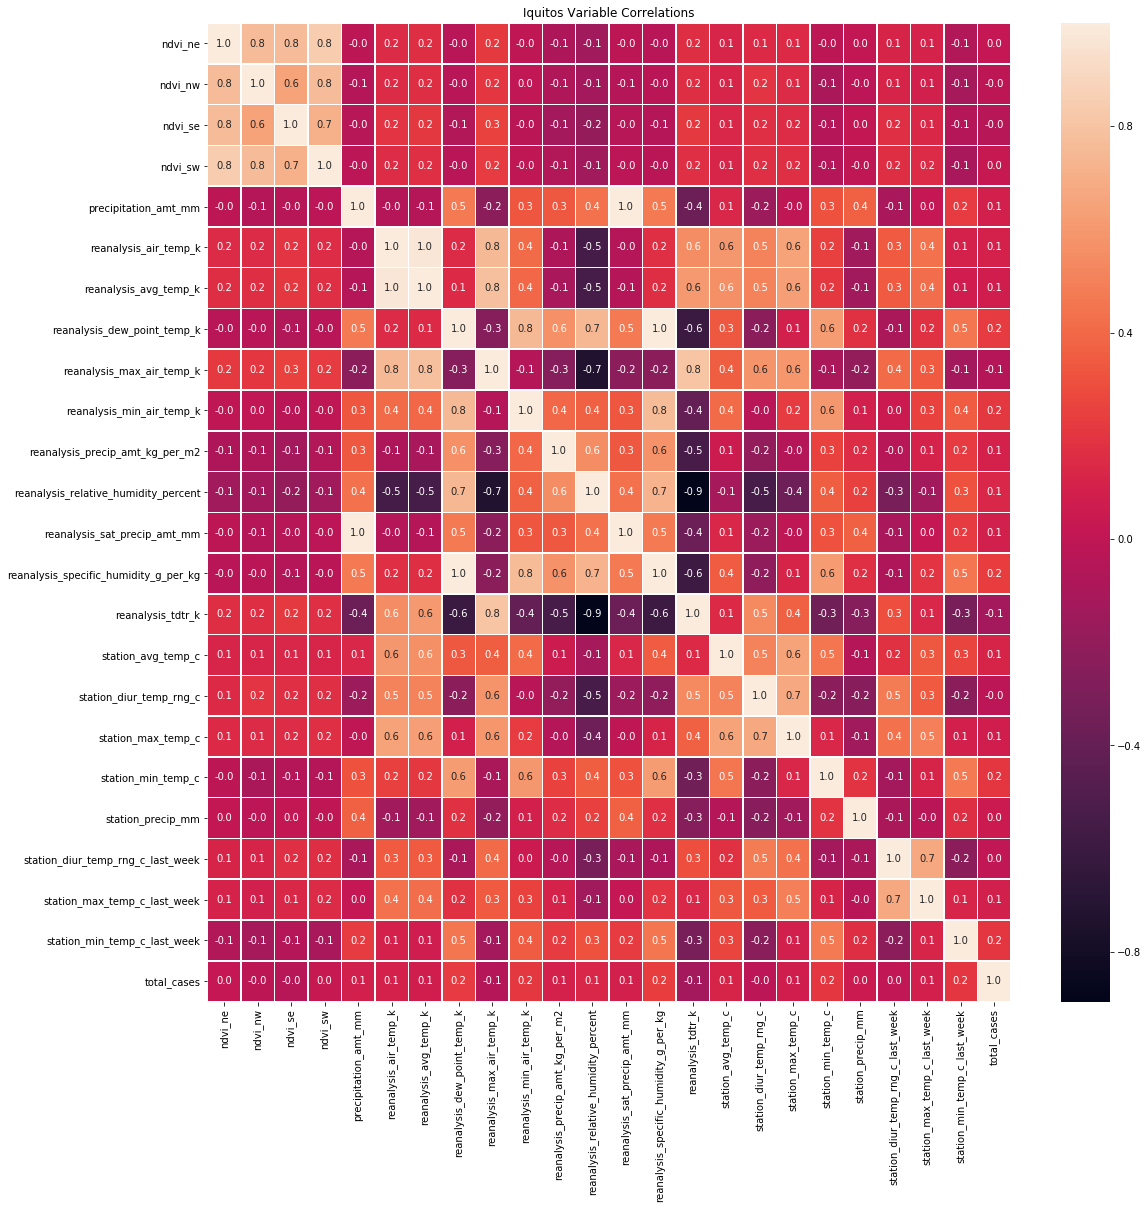

In [13]:
# plot iquitos
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(iq_train_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Iquitos Variable Correlations')

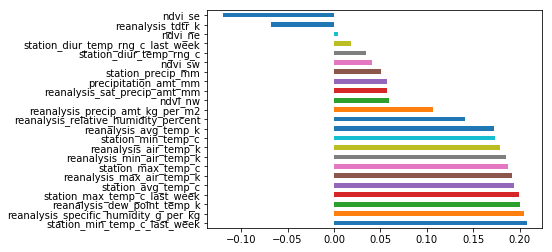

In [14]:
# San Juan
(sj_train_features.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

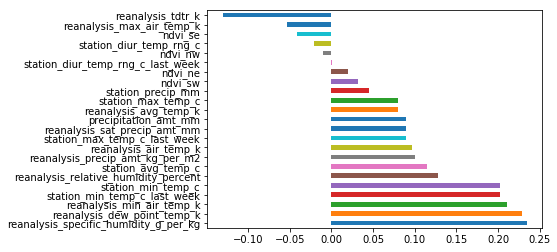

In [15]:
# Iquitos
(iq_train_features.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

# A few observations

<b>The wetter the better</b>

The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. This makes sense: we know mosquitos thrive wet climates, the wetter the better!

<b>Hot and heavy</b>

As we all know, "cold and humid" is not a thing. So it's not surprising that as minimum temperatures, maximum temperatures, and average temperatures rise, the total_cases of dengue fever tend to rise as well.

<b>Sometimes it rains, so what</b>

Interestingly, the precipitation measurements bear little to no correlation to total_cases, despite strong correlations to the humidity measurements, as evident by the heatmaps above.

<b>A few good variables</b>
* reanalysis_specific_humidity_g_per_kg
* reanalysis_dew_point_temp_k
* station_avg_temp_c
* station_min_temp_c


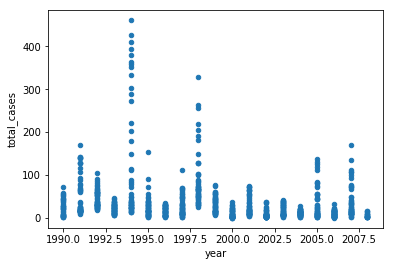

In [16]:
sj_train_features.reset_index().plot.scatter(x='year', y='total_cases')

In [17]:
# correlation = sj_train_features.corr(method='pearson')
# sj_columns = correlation.nlargest(7, 'total_cases').index
# sj_columns = list(sj_columns)
# sj_columns.remove('total_cases')
# sj_columns
# sj_train_features.reset_index().plot.scatter(x='year', y='total_cases')
# sj_train_features.head()

In [18]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

def preprocess_data(data_path, labels_path=None):
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c', 'week_start_date']
#     features = sj_columns
#     if 'week_start_date' not in features : features += ['week_start_date']

    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0])
    
    #use previous week inputs
#     feature_columns = list(df.columns)[-7:-1]
#     for col in feature_columns:
#         df[col + '_last_week'] = None
#         features.append(col + '_last_week')
#     prev_index = None
#     for index, row in df.iterrows():
#         if prev_index :
#             for col in feature_columns:
#                 df.ix[index, col + '_last_week'] = df.ix[prev_index, col]
#         prev_index = index    

#     if labels_path :
#         df = df.iloc[1:]

    df['year_i'] = df['year'].apply(lambda y: y % 2)
    features.append('year_i')

    df = df[features]
    
    
#     df['week_start_date'] = pd.to_datetime(df['week_start_date'])
#     for i in xrange(1,5):
#         df['quarter_' + str(i)] = df['week_start_date'].apply(lambda date: 1 if (
#             ((i-1)*3<date.to_datetime().month) and (date.to_datetime().month <= i * 3)) else 0)
#         features.append('quarter_' + str(i))
    
    df = df.drop(['week_start_date'], axis=1)
    features.remove('week_start_date')
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)
    
    
    # Standardizing the data
    scaler = StandardScaler()
    
    sj_label = None
    iq_label = None
    # add labels to dataframe
    if labels_path:
        #remove outliers   
#         low = .001
#         high = .999
#         quant_df = df.quantile([low, high])
#         print(quant_df)
#         df = df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
#                                     (x <= quant_df.loc[high,x.name])], axis=0)
#         df.dropna(inplace=True)
#         print(df)
        labels = pd.read_csv(labels_path, index_col=[0])
#         df = df.join(labels)
        sj_label = pd.DataFrame(labels.loc['sj'])
        iq_label = pd.DataFrame(labels.loc['iq'])

    
    # separate san juan and iquitos
#     sj = pd.DataFrame(scaler.fit_transform(df.loc['sj']))
#     iq = pd.DataFrame(scaler.fit_transform(df.loc['iq']))
    sj = pd.DataFrame(df.loc['sj'])
    iq = pd.DataFrame(df.loc['iq'])
    
    
    return sj, iq, sj_label, iq_label

In [19]:
sj_train, iq_train, sj_label, iq_label = preprocess_data(train_feature_filename, labels_path=train_label_filename)

sj_label.shape

(936, 3)

In [20]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

# sj_train.head()

sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_train, sj_label['total_cases'], test_size=0.1, random_state=0, shuffle=False)

iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(iq_train, iq_label['total_cases'], test_size=0.2, random_state=0, shuffle=False)

sj_train_X.head()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,year_i
city,,,,,
sj,14.012857,292.414286,25.442857,20.0,0
sj,15.372857,293.951429,26.714286,22.2,0
sj,16.848571,295.434286,26.714286,22.8,0
sj,16.672857,295.310000,27.471429,23.3,0
sj,17.210000,295.821429,28.942857,23.9,0


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# from catboost import CatBoostRegressor
import xgboost as xgb
def formatPredictions(X_orig, pred_orig) :
    pred = pred_orig.copy()
    X = X_orig.copy()
    pred = pred[1:]
    pred = np.concatenate([pred, [pred[-1]]])
    X['predictions_prev_week'] = pred
    return X

sj_model = GradientBoostingRegressor(loss='lad', n_estimators=100, warm_start=True, learning_rate=0.1, max_depth=1, random_state=0)
# sj_model = xgb.XGBRegressor()
# sj_model = LinearRegression()
# sj_model = CatBoostRegressor(random_seed=0)

sj_model.fit(sj_train_X, sj_train_y)
sj_pred_val_temp = sj_model.predict(sj_test_X)


sj_model_2 = GradientBoostingRegressor(loss='lad', n_estimators=100, 
                                       warm_start=True, learning_rate=0.1, 
                                       max_depth=1, random_state=0)
sj_train_X_new = formatPredictions(sj_train_X, sj_train_y.values)
sj_model_2.fit(sj_train_X_new, sj_train_y)

sj_test_X_new = formatPredictions(sj_test_X, sj_pred_val_temp)

sj_pred_val = sj_model_2.predict(sj_test_X_new)
print("SJ : MAE : " + str(mean_absolute_error(sj_test_y, sj_pred_val)))


# ........................IQ model....................................

iq_model = RandomForestRegressor(n_estimators=200, max_features='auto',
                                 max_depth=6, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1)

iq_model.fit(iq_train_X, iq_train_y)
iq_pred_val_temp = iq_model.predict(iq_test_X)

iq_model_2 = RandomForestRegressor(n_estimators=200, max_features='auto',
                                 max_depth=6, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1)
iq_train_X_new = formatPredictions(iq_train_X, iq_train_y.values)
iq_model_2.fit(iq_train_X_new, iq_train_y)

iq_test_X_new = formatPredictions(iq_test_X, iq_pred_val_temp)

iq_pred_val = iq_model_2.predict(iq_test_X_new)

print("IQ : MAE : " + str(mean_absolute_error(iq_test_y, iq_pred_val)))


# # sj_model.feature_importances_

SJ : MAE : 18.24143314946881
IQ : MAE : 6.560625000000001


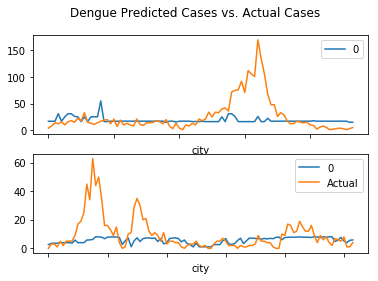

In [22]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
pd.DataFrame(sj_pred_val).plot(ax=axes[0], label="Predictions")
sj_test_y.plot(ax=axes[0], label="Actual")

# plot iq
pd.DataFrame(iq_pred_val).plot(ax=axes[1], label="Predictions")
iq_test_y.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [23]:
sj_test, iq_test, sj_test_label, iq_test_label = preprocess_data(test_feature_filename)

sj_predictions = sj_model.predict(sj_test).astype(int)
iq_predictions = iq_model.predict(iq_test).astype(int)

# sj_predictions = formatPredictions(sj_predictions)
# sj_predictions


sj_test_new = formatPredictions(sj_test, sj_predictions)
sj_predictions_new = sj_model_2.predict(sj_test_new).astype(int)

iq_test_new = formatPredictions(iq_test, iq_predictions)
iq_predictions_new = iq_model_2.predict(iq_test_new).astype(int)



submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions_new, iq_predictions_new])

submission.to_csv("submission_4.csv")

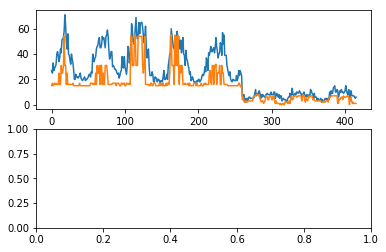

In [24]:
benchmark = pd.read_csv('benchmark.csv')
submission = pd.read_csv('submission_4.csv')


# adder = lambda x: x + 10
# formated_total_cases = submission['total_cases'].apply(adder)

# print(formated_total_cases)

figs, axes = plt.subplots(nrows=2, ncols=1)

# # submission = submission.iloc[50:]
# plot sj
benchmark.total_cases.plot(ax=axes[0], label="Predictions")
submission.total_cases.plot(ax=axes[0], label="Actual")
    

# plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
# plt.legend()

# plt.show()